In [1]:
# Import Dependencies
%matplotlib inline

# Begin Python Imports
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [2]:
# IMPORT DATA 

# Read 2016 airport data 
flight_data = pd.read_csv('2016.csv')

In [3]:
# Check first 2 instances and last 2 instances
flight_data.head(2).append(flight_data.tail(2))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,NaN,0.0,309.0,285.0,249.0,1979.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,NaN,0.0,116.0,109.0,92.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN
5617656,2016-12-31,NK,124,RSW,ORD,1704,1711.0,7.0,9.0,1720.0,1854.0,7.0,1907,1901.0,-6.0,0.0,NaN,0.0,183.0,170.0,154.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
5617657,2016-12-31,NK,126,FLL,MYR,2015,2208.0,113.0,21.0,2229.0,2344.0,6.0,2153,2350.0,117.0,0.0,NaN,0.0,98.0,102.0,75.0,529.0,113.0,0.0,4.0,0.0,0.0,NaN


Dataset exploration

In [4]:
# Check dimension of dataset
flight_data.shape
print("There are "+ str(flight_data.shape[0]) +" rows and "+ str(flight_data.shape[1]) +" columns from the flight dataset.")

There are 5617658 rows and 28 columns from the flight dataset.


In [5]:
# Convert flight_data column to datetime format
flight_data['FL_DATE'] =  pd.to_datetime(flight_data['FL_DATE'], format='%Y-%m-%d')

In [6]:
# Check column type
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5617658 entries, 0 to 5617657
Data columns (total 28 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

# Metadata

FL_DATE = Date of the Flight

OP_CARRIER = Airline Identifier

OP_CARRIER_FL_NUM = Flight Number

ORIGIN = Starting Airport Code

DEST = Destination Airport Code

CRS_DEP_TIME = Planned Departure Time

DEP_TIME = Actual Departure Time

DEP_DELAY = Total Delay on Departure in minutes

TAXI_OUT = The time duration elapsed between departure from the origin airport gate and wheels off

WHEELS_OFF = The time point that the aircraft's wheels leave the ground

WHEELS_ON = The time point that the aircraft'ss wheels touch on the ground

TAXI_IN = The time duration elapsed between wheels-on and gate arrival at the destination airport

CRS_ARR_TIME = Planned arrival time

ARR_TIME = Actual Arrival Time = ARRIVAL_TIME - SCHEDULED_ARRIVAL

ARR_DELAY = Total Delay on Arrival in minutes

CANCELLED = Flight Cancelled (1 = cancelled)

CANCELLATION_CODE = Reason for Cancellation of flight: A - Airline/Carrier; B -
Weather; C - National Air System; D - Security

DIVERTED = Aircraft landed on different airport that the one scheduled

CRS_ELAPSED_TIME = Planned time amount needed for the flight trip

ACTUAL_ELAPSED_TIME = AIR_TIME+TAXI_IN+TAXI_OUT

AIR_TIME = The time duration between wheels_off and wheels_on time

DISTANCE = Distance between two airports

CARRIER_DELAY = Delay caused by the airline in minutes

WEATHER_DELAY = Delay caused by weather

NAS_DELAY = Delay caused by air system

SECURITY_DELAY = caused by security reasons

LATE_AIRCRAFT_DELAY = Delay caused by security

# Data Preprocessing

Handling of missing data

Transformation of Duration time taken

Rename of OP_CARRIER

Transformation of Date

Data reduction: Focus on Busy Airports
    
Rename of airports and city

Transformation of Target attribute: Flight status

In [7]:
#  Handling missing data

# Calculate the proportion of missing data

def checkMissing(data,perc=0):
    """ 
    Takes in a dataframe and returns
    the percentage of missing value.
    """
    missing = [(i, data[i].isna().mean()*100) for i in data]
    missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
    missing = missing[missing.percentage > perc]
    print(missing.sort_values("percentage", ascending=False).reset_index(drop=True))

print("Proportion of missing data in columns")
checkMissing(flight_data)

Proportion of missing data in columns
            column_name  percentage
0           Unnamed: 27  100.000000
1     CANCELLATION_CODE   98.827608
2        SECURITY_DELAY   82.835570
3   LATE_AIRCRAFT_DELAY   82.835570
4         CARRIER_DELAY   82.835570
5         WEATHER_DELAY   82.835570
6             NAS_DELAY   82.835570
7             ARR_DELAY    1.415412
8   ACTUAL_ELAPSED_TIME    1.415412
9              AIR_TIME    1.415412
10            WHEELS_ON    1.207692
11              TAXI_IN    1.207692
12             ARR_TIME    1.207692
13             TAXI_OUT    1.164507
14           WHEELS_OFF    1.164507
15             DEP_TIME    1.129581
16            DEP_DELAY    1.129581
17     CRS_ELAPSED_TIME    0.000107


These columns are dropped: Unnamed: 27, CANCELLATION_CODE, LATE_AIRCRAFT_DELAY, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY and SECURITY_DELAY from the dataframe as these columns had more than 50% of missing values which does not provide any useful information to our analysis. Since our main objective is to predict flight delay, column CANCELLED is irrelevant to our scope of work as a canceled flight is not a delayed flight as it never left nor arrived to its destination for whatever reason. OP_CARRIER_FL_NUM is also not relevant to our predictions.

After further investigation on the dataset, LATE_AIRCRAFT_DELAY, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY and SECURITY_DELAY are showing the split of delayed minutes for the flight. Thus, the missing data is actually implying that there is no delay for the instance. The missing values for these attributes are imputed with zero.

In [8]:
#Fill the missing value 0
flight_data['LATE_AIRCRAFT_DELAY']=flight_data['LATE_AIRCRAFT_DELAY'].fillna(0)
flight_data['CARRIER_DELAY']=flight_data['CARRIER_DELAY'].fillna(0)
flight_data['WEATHER_DELAY']=flight_data['WEATHER_DELAY'].fillna(0)
flight_data['NAS_DELAY']=flight_data['NAS_DELAY'].fillna(0)
flight_data['SECURITY_DELAY']=flight_data['SECURITY_DELAY'].fillna(0)

# Transformation of Duration time taken
Checking on the calculation for Departure Delay and Arrival Delay in minutes

The derivation of the delayed time of departure and delayed time of arrival is as shown below:

DEP_DELAY = CRS_DEP_TIME - DEP_TIME
ARR_DELAY = ARR_TIME - CRS_ARR_TIME
CRS_DEP_TIME, DEP_TIME, CRS_ARR_TIME and ARR_TIME can be eliminated asDEP_DELAY and ARR_DELAY are informative enough to provide the length of time of the delay in minutes.

In [9]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
        # return pd.to_datetime(heure, format='%H:%M:%S')
    
    # pd.to_datetime(heure, format='%Y-%m-%d')

In [10]:
flight_data['DEP_TIME'] = flight_data['DEP_TIME'].apply(format_heure)
flight_data['CRS_DEP_TIME'] = flight_data['CRS_DEP_TIME'].apply(format_heure)

flight_data['ARR_TIME'] = flight_data['ARR_TIME'].apply(format_heure) 
flight_data['CRS_ARR_TIME'] = flight_data['CRS_ARR_TIME'].apply(format_heure)

flight_data['WHEELS_OFF'] = flight_data['WHEELS_OFF'].apply(format_heure)
flight_data['WHEELS_ON'] = flight_data['WHEELS_ON'].apply(format_heure)

Duration of time taken for:

-Flight take off and wheels off

-Flight on land and wheels on

In [11]:
# Convert flight_data column to datetime format

def time_difference(actual,plan):
    actual_time = pd.to_timedelta(actual.astype(str)) 
    plan_time = pd.to_timedelta(plan.astype(str))
    return actual_time.sub(plan_time).dt.total_seconds().div(60)

flight_data['WHEELS_OFF_elapse'] =  time_difference(flight_data['WHEELS_OFF'],flight_data['DEP_TIME'])
flight_data['WHEELS_ON_elapse'] =  time_difference(flight_data['ARR_TIME'] ,flight_data['WHEELS_ON'])

# Remove incorrect record
flight_data=flight_data[flight_data['WHEELS_OFF_elapse']>0]
flight_data=flight_data[flight_data['WHEELS_ON_elapse']>0]

In [12]:
# Check first 2 instances and last 2 instances
flight_data.head(2).append(flight_data.tail(2))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,WHEELS_OFF_elapse,WHEELS_ON_elapse
0,2016-01-01,DL,1248,DTW,LAX,19:35:00,19:35:00,0.0,23.0,19:58:00,21:07:00,13.0,21:44:00,21:20:00,-24.0,0.0,NaN,0.0,309.0,285.0,249.0,1979.0,0.0,0.0,0.0,0.0,0.0,NaN,23.0,13.0
1,2016-01-01,DL,1251,ATL,GRR,21:25:00,21:30:00,5.0,13.0,21:43:00,23:15:00,4.0,23:21:00,23:19:00,-2.0,0.0,NaN,0.0,116.0,109.0,92.0,640.0,0.0,0.0,0.0,0.0,0.0,NaN,13.0,4.0
5617656,2016-12-31,NK,124,RSW,ORD,17:04:00,17:11:00,7.0,9.0,17:20:00,18:54:00,7.0,19:07:00,19:01:00,-6.0,0.0,NaN,0.0,183.0,170.0,154.0,1120.0,0.0,0.0,0.0,0.0,0.0,NaN,9.0,7.0
5617657,2016-12-31,NK,126,FLL,MYR,20:15:00,22:08:00,113.0,21.0,22:29:00,23:44:00,6.0,21:53:00,23:50:00,117.0,0.0,NaN,0.0,98.0,102.0,75.0,529.0,113.0,0.0,4.0,0.0,0.0,NaN,21.0,6.0


In [13]:
# Check column type
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5515676 entries, 0 to 5617657
Data columns (total 30 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         object        
 6   DEP_TIME             object        
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           object        
 10  WHEELS_ON            object        
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         object        
 13  ARR_TIME             object        
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

In [14]:
#check_depart = flight_data[flight_data['DEP_DELAY_c'] != flight_data['DEP_DELAY']]  
#check_arrival = flight_data[flight_data['ARR_DELAY_c'] != flight_data['ARR_DELAY']] 

#print("The duration of delayed which is not tally:")
#print("For time taken of departure delay")
#print(check_depart.shape)
#print()
#print("For time taken of arrival delay")
#print(check_arrival.shape)

In [15]:
#check_depart.loc[:,['DEP_TIME','CRS_DEP_TIME','DEP_DELAY_c','DEP_DELAY']]

In [16]:
#check_arrival.loc[:,['ARR_TIME','CRS_ARR_TIME','ARR_DELAY_c','ARR_DELAY']]

In [17]:
# Drop the unused columns 

flight_data.drop(['Unnamed: 27', 
                  'CANCELLATION_CODE',
                  'CANCELLED',
                  'OP_CARRIER_FL_NUM',
                  'CRS_DEP_TIME',
                  'DEP_TIME',
                  'CRS_ARR_TIME',
                  'ARR_TIME',
                  'WHEELS_ON',
                  'WHEELS_OFF'
                 ],
                 axis = 1, inplace = True)

Drop those missing rows since the percentage of missing values is 1%. Imputation with cold-deck method may introduce noise to the data, so its best to avoid that.

In [18]:
#Check number of missing values
flight_data.isna().sum()

FL_DATE                    0
OP_CARRIER                 0
ORIGIN                     0
DEST                       0
DEP_DELAY                  0
TAXI_OUT                   0
TAXI_IN                    0
ARR_DELAY              11506
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME    11506
AIR_TIME               11506
DISTANCE                   0
CARRIER_DELAY              0
WEATHER_DELAY              0
NAS_DELAY                  0
SECURITY_DELAY             0
LATE_AIRCRAFT_DELAY        0
WHEELS_OFF_elapse          0
WHEELS_ON_elapse           0
dtype: int64

In [19]:
flight_data = flight_data.dropna()

In [20]:
#Check number of missing values
flight_data.isna().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
DEP_DELAY              0
TAXI_OUT               0
TAXI_IN                0
ARR_DELAY              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
WHEELS_OFF_elapse      0
WHEELS_ON_elapse       0
dtype: int64


# Rename of OP_CARRIER
OP_CARRIER refers to the airline identifier recorded with its abbreviation form. To make the content more intuitive, the column of abbreviation names are transformed with airlines extended names. The main reference source for the extended name is obtained from Wikipedia

In [21]:
# Check the instances for OP_CARRIER
flight_data.OP_CARRIER.unique()

array(['DL', 'AS', 'EV', 'F9', 'WN', 'OO', 'HA', 'NK', 'UA', 'VX', 'AA',
       'B6'], dtype=object)

In [22]:
flight_data['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

In [23]:
flight_data.OP_CARRIER.nunique()

12

In [24]:
flight_data.OP_CARRIER.value_counts()

Southwest Airlines    1275932
Delta Airlines         912078
American Airlines      893828
SkyWest Airlines       593732
United Airlines        533469
ExpressJet             476707
JetBlue Airways        274153
Alaska Airlines        174282
Spirit Airlines        133650
Frontier Airlines       92078
Hawaiian Airlines       76461
Virgin America          67800
Name: OP_CARRIER, dtype: int64

# Data reduction: Focuing on Busy Airports

Even though a lot of pre-processing and cleaning has been done on a separate notebook, this one will be only aiming to obtain a final dataframe for the modeling which will have the top 20 cities only. The reason to do it this way is because the DEST feature is a categorical column of 358 values. The hot encoding will then be done for this 20 instead of the 358 total destinations.

In [25]:
flight_data.DEST.value_counts().iloc[:20]

ATL    379991
ORD    237337
DEN    221227
LAX    208734
DFW    191874
SFO    168601
PHX    157008
LAS    148394
IAH    133875
SEA    130918
MSP    127406
MCO    122939
DTW    122353
BOS    118140
EWR    111222
CLT    108598
SLC    107846
JFK     94144
BWI     93755
LGA     93246
Name: DEST, dtype: int64

In [26]:
top_cities = flight_data.DEST.value_counts().iloc[0:1].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,ATL,379991


In [27]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST.unique()

# Creating a list with top cities only:
city_list = top_cities['DEST'].tolist()

In [28]:
boolean_series =  flight_data.DEST.isin(city_list)
flight_data =  flight_data[boolean_series]
flight_data.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse
2,2016-01-01,Delta Airlines,LAX,ATL,1.0,19.0,5.0,-13.0,0.0,245.0,231.0,207.0,1947.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0
3,2016-01-01,Delta Airlines,SLC,ATL,4.0,12.0,8.0,-16.0,0.0,213.0,193.0,173.0,1590.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0
6,2016-01-01,Delta Airlines,BNA,ATL,86.0,15.0,6.0,74.0,0.0,70.0,58.0,37.0,214.0,3.0,0.0,0.0,0.0,71.0,15.0,6.0
8,2016-01-01,Delta Airlines,JAX,ATL,-1.0,12.0,8.0,-15.0,0.0,77.0,63.0,43.0,270.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0
13,2016-01-01,Delta Airlines,MDT,ATL,-10.0,11.0,11.0,-15.0,0.0,132.0,127.0,105.0,620.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0


In [29]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379991 entries, 2 to 5617492
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FL_DATE              379991 non-null  datetime64[ns]
 1   OP_CARRIER           379991 non-null  object        
 2   ORIGIN               379991 non-null  object        
 3   DEST                 379991 non-null  object        
 4   DEP_DELAY            379991 non-null  float64       
 5   TAXI_OUT             379991 non-null  float64       
 6   TAXI_IN              379991 non-null  float64       
 7   ARR_DELAY            379991 non-null  float64       
 8   DIVERTED             379991 non-null  float64       
 9   CRS_ELAPSED_TIME     379991 non-null  float64       
 10  ACTUAL_ELAPSED_TIME  379991 non-null  float64       
 11  AIR_TIME             379991 non-null  float64       
 12  DISTANCE             379991 non-null  float64       
 13  CARRIER_DELAY

# Transformation for Date

In [30]:
import calendar
flight_date=pd.DatetimeIndex(flight_data['FL_DATE'])

flight_data['DAY'] = flight_date.day
flight_data['MONTH'] = flight_date.month
flight_data['MONTH_AB'] = flight_data['MONTH'].apply(lambda x: calendar.month_abbr[x])
flight_data['DAYOFWEEK'] = flight_date.dayofweek
flight_data['DAYNAME'] = flight_data['DAYOFWEEK'].apply(lambda x: calendar.day_name[x])

# 1 Weekday, 0 Weekend
daytype = []
for value in flight_data['DAYOFWEEK']:
    if value in (0,1,2,3,4):
        daytype.append(1) #weekday
    else:
        daytype.append(0) #weekend
flight_data['WEEKDAY'] = daytype
flight_data.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
2,2016-01-01,Delta Airlines,LAX,ATL,1.0,19.0,5.0,-13.0,0.0,245.0,231.0,207.0,1947.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,1,1,Jan,4,Friday,1
3,2016-01-01,Delta Airlines,SLC,ATL,4.0,12.0,8.0,-16.0,0.0,213.0,193.0,173.0,1590.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,1,1,Jan,4,Friday,1


In [31]:
# For checking
print('Maximum number of days in a month:', flight_data.DAY.nunique())
print('Total number of months:', flight_data.MONTH.nunique())
print('Total number of days per week:', flight_data.DAYNAME.nunique())

print()

print('Months present in dataframe:',flight_data.MONTH.unique())
print('Months present in dataframe:', flight_data.MONTH_AB.unique())

print()
print('Days present in dataframe:', flight_data['DAYOFWEEK'].unique())
print('Days present in dataframe:', flight_data.DAYNAME.unique())

Maximum number of days in a month: 31
Total number of months: 12
Total number of days per week: 7

Months present in dataframe: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months present in dataframe: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']

Days present in dataframe: [4 5 6 0 1 2 3]
Days present in dataframe: ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']


# Rename of Airports and city name
These two column have the IATA airports codes for the origin and destination. I will try to change it to a real city name so that I can do flight analysis per city as well as part of the EDA.

For this purpose I found a file called airports from 2015, therefore it might be incomplete so I will have to play with it and see what I can do to complete it.

Lets start by loading the file and by exploring it:

Columns ORIGIN and DEST are made up of the IATA airports codes to display the origin and destination. Cleaning of the columns are required to obtain the city name for further flight analysis by destination. For this purpose I found a file called airports from 2015, therefore it might be incomplete so I will have to play with it and see what I can do to complete it.

In [32]:
airports = pd.read_csv('airports.csv')
airports.head(10)

,IATA_CODE,AIRPORT,CITY
0,AZA,Phoenix-Mesa Gateway Airport,NaN
1,BKG,Branson Airport,NaN
2,ABE,Lehigh Valley International Airport,Allentown
3,ABI,Abilene Regional Airport,Abilene
4,ABQ,Albuquerque International Sunport,Albuquerque
5,ABR,Aberdeen Regional Airport,Aberdeen
6,ABY,Southwest Georgia Regional Airport,Albany
7,ACK,Nantucket Memorial Airport,Nantucket
8,ACT,Waco Regional Airport,Waco
9,ACV,Arcata Airport,Arcata/Eureka


In [33]:
# Check dimension of dataset
airports.shape
print("There are "+ str(airports.shape[0]) +" rows and "+ str(airports.shape[1]) +" columns from the airport dataset.")

There are 353 rows and 3 columns from the airport dataset.


In [34]:
print("There are "+str(len(airports.IATA_CODE.unique()))+" records")

There are 353 records


In [35]:
# Covert to list
airport_IATA_CODE = list(airports['IATA_CODE'])

In [36]:
flight_data.ORIGIN.unique()

array(['LAX', 'SLC', 'BNA', 'JAX', 'MDT', 'SAV', 'BUF', 'PNS', 'CMH',
       'DAL', 'MEM', 'SEA', 'RDU', 'PIT', 'SRQ', 'SDF', 'RIC', 'LAS',
       'FAY', 'JAC', 'GRR', 'EYW', 'MCI', 'ROC', 'TPA', 'DEN', 'CHS',
       'CVG', 'FLL', 'BWI', 'RSW', 'LGA', 'DTW', 'MIA', 'GSO', 'CLE',
       'GPT', 'LIT', 'IAH', 'PHL', 'MCO', 'IND', 'DAY', 'OKC', 'PHX',
       'BDL', 'STL', 'OMA', 'CAE', 'SAN', 'SJU', 'BOS', 'ORD', 'SAT',
       'MSY', 'PBI', 'MKE', 'SFO', 'SJC', 'IAD', 'DFW', 'AUS', 'ABQ',
       'HOU', 'MSP', 'DCA', 'HDN', 'SGF', 'MSN', 'MLB', 'TUL', 'PDX',
       'ECP', 'HSV', 'BHM', 'EWR', 'TYS', 'SYR', 'MDW', 'ALB', 'BZN',
       'FNT', 'MLI', 'MLU', 'CHA', 'MYR', 'GSP', 'MGM', 'OAJ', 'VPS',
       'SHV', 'GNV', 'TLH', 'BMI', 'TRI', 'FSM', 'VLD', 'GTR', 'BTR',
       'BQK', 'XNA', 'DHN', 'ORF', 'ILM', 'AGS', 'ROA', 'LEX', 'HPN',
       'JAN', 'GRK', 'CRW', 'CID', 'LFT', 'AEX', 'PIA', 'AVL', 'PHF',
       'MOB', 'ABE', 'DSM', 'CLT', 'ABY', 'EWN', 'EVV', 'CSG', 'TTN',
       'CAK', 'OAK',

In [37]:
# Get the list of origin and destination from `flight_data` 
flight_ORIGIN = flight_data.ORIGIN.unique().tolist()
flight_DEST = flight_data.DEST.unique().tolist()

# Check type
print("Type:")
print(type(flight_ORIGIN))
print(type(flight_DEST))
print()
print("Length:")
print("Origin: "+str(len(flight_ORIGIN)))
print("Destination: "+str(len(flight_DEST)))

Type:
<class 'list'>
<class 'list'>

Length:
Origin: 165
Destination: 1


# Between flight_ORIGIN and airport_IATA_CODE

In [38]:
difference = [item for item in flight_ORIGIN if item not in airport_IATA_CODE]
print("IATA Code (Origin) that is not found from the airport data:")
print(difference)
print()
print("There are "+str(len(difference)))

IATA Code (Origin) that is not found from the airport data:
[]

There are 0


# Between flight_DEST and airport_IATA_CODE

In [39]:
difference_2 = [item for item in flight_DEST if item not in airport_IATA_CODE]
print("IATA Code (Destination) that is not found from airport data:")
print(difference_2)
print()

IATA Code (Destination) that is not found from airport data:
[]



The next step if to save this dataframe ass a .csv file and to open it in Excel where I will add the necessary columns to make it match with the airports dataframe. These columns are:

> Airport Name

> City Name

In [40]:
# Creating a dictionary and looking at its type for QC purposes
airport_dict = pd.Series(airports.AIRPORT.values, index=airports.IATA_CODE).to_dict()
print(type(airport_dict))

<class 'dict'>


In [41]:
flight_data['ORIGIN'].replace(airport_dict, inplace=True)
flight_data['DEST'].replace(airport_dict, inplace=True)
flight_data.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
2,2016-01-01,Delta Airlines,Los Angeles International Airport,Hartsfield-Jackson Atlanta International Airport,1.0,19.0,5.0,-13.0,0.0,245.0,231.0,207.0,1947.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,1,1,Jan,4,Friday,1
3,2016-01-01,Delta Airlines,Salt Lake City International Airport,Hartsfield-Jackson Atlanta International Airport,4.0,12.0,8.0,-16.0,0.0,213.0,193.0,173.0,1590.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,1,1,Jan,4,Friday,1
6,2016-01-01,Delta Airlines,Nashville International Airport,Hartsfield-Jackson Atlanta International Airport,86.0,15.0,6.0,74.0,0.0,70.0,58.0,37.0,214.0,3.0,0.0,0.0,0.0,71.0,15.0,6.0,1,1,Jan,4,Friday,1
8,2016-01-01,Delta Airlines,Jacksonville International Airport,Hartsfield-Jackson Atlanta International Airport,-1.0,12.0,8.0,-15.0,0.0,77.0,63.0,43.0,270.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,1,1,Jan,4,Friday,1
13,2016-01-01,Delta Airlines,Harrisburg International Airport,Hartsfield-Jackson Atlanta International Airport,-10.0,11.0,11.0,-15.0,0.0,132.0,127.0,105.0,620.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,1,1,Jan,4,Friday,1


# Transformation of Target attribute: Flight status
FLIGHT_STATUS is the outcome of the flight whether it arrives destination on time or it is delayed, thus the responses is binary where 0 is for flights that arrive earlier or on time and 1 is for flights that are delayed.

In [42]:
status = []

for value in flight_data['ARR_DELAY']:
    if value <= 15:
        status.append(0)
    else:
        status.append(1)
flight_data['FLIGHT_STATUS'] = status   

#  Exploratory Data Analysis

In [43]:
flight_category = flight_data.select_dtypes(include=['object','category'])
flight_numerical = flight_data.select_dtypes(exclude=['object'])

[Text(0.5, 0, 'Number of counts')]

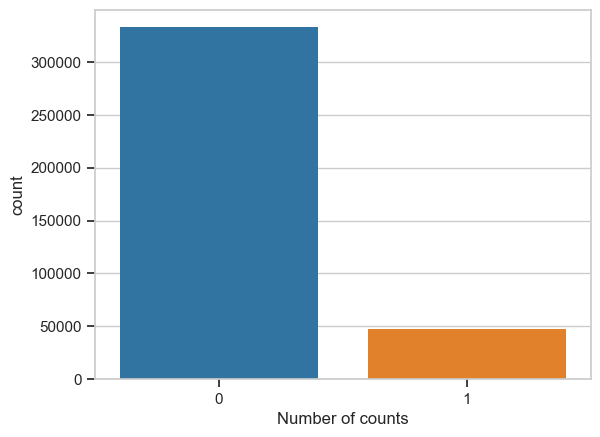

In [44]:
# Output Barplot showing the occurence of flight outcome

sns.set_context("notebook")
g=sns.countplot(x="FLIGHT_STATUS",data=flight_data)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

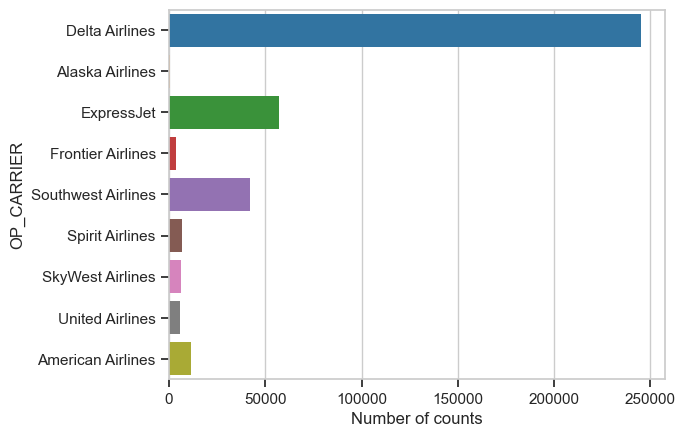

In [45]:
# Output Barplot showing the occurence of each categorical features         

sns.set_context("notebook")
g=sns.countplot(y="OP_CARRIER",data=flight_category)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

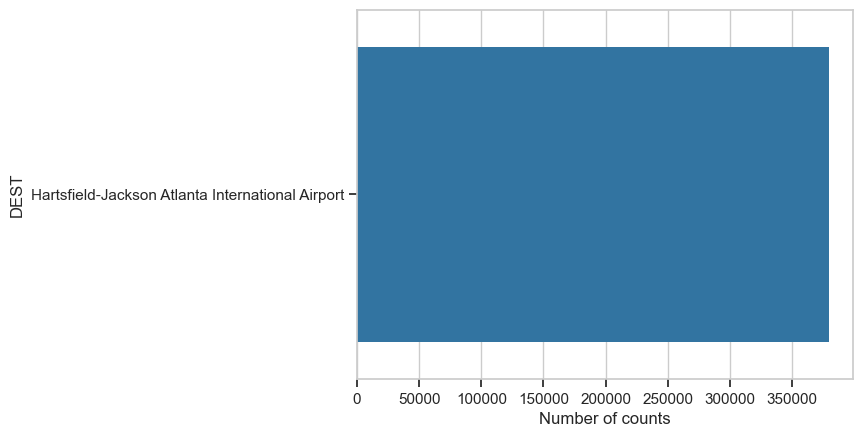

In [46]:
# Output Barplot showing the occurence of each categorical features         

sns.set_context("notebook")
g=sns.countplot(y="DEST",data=flight_category)
g.set(xlabel="Number of counts")

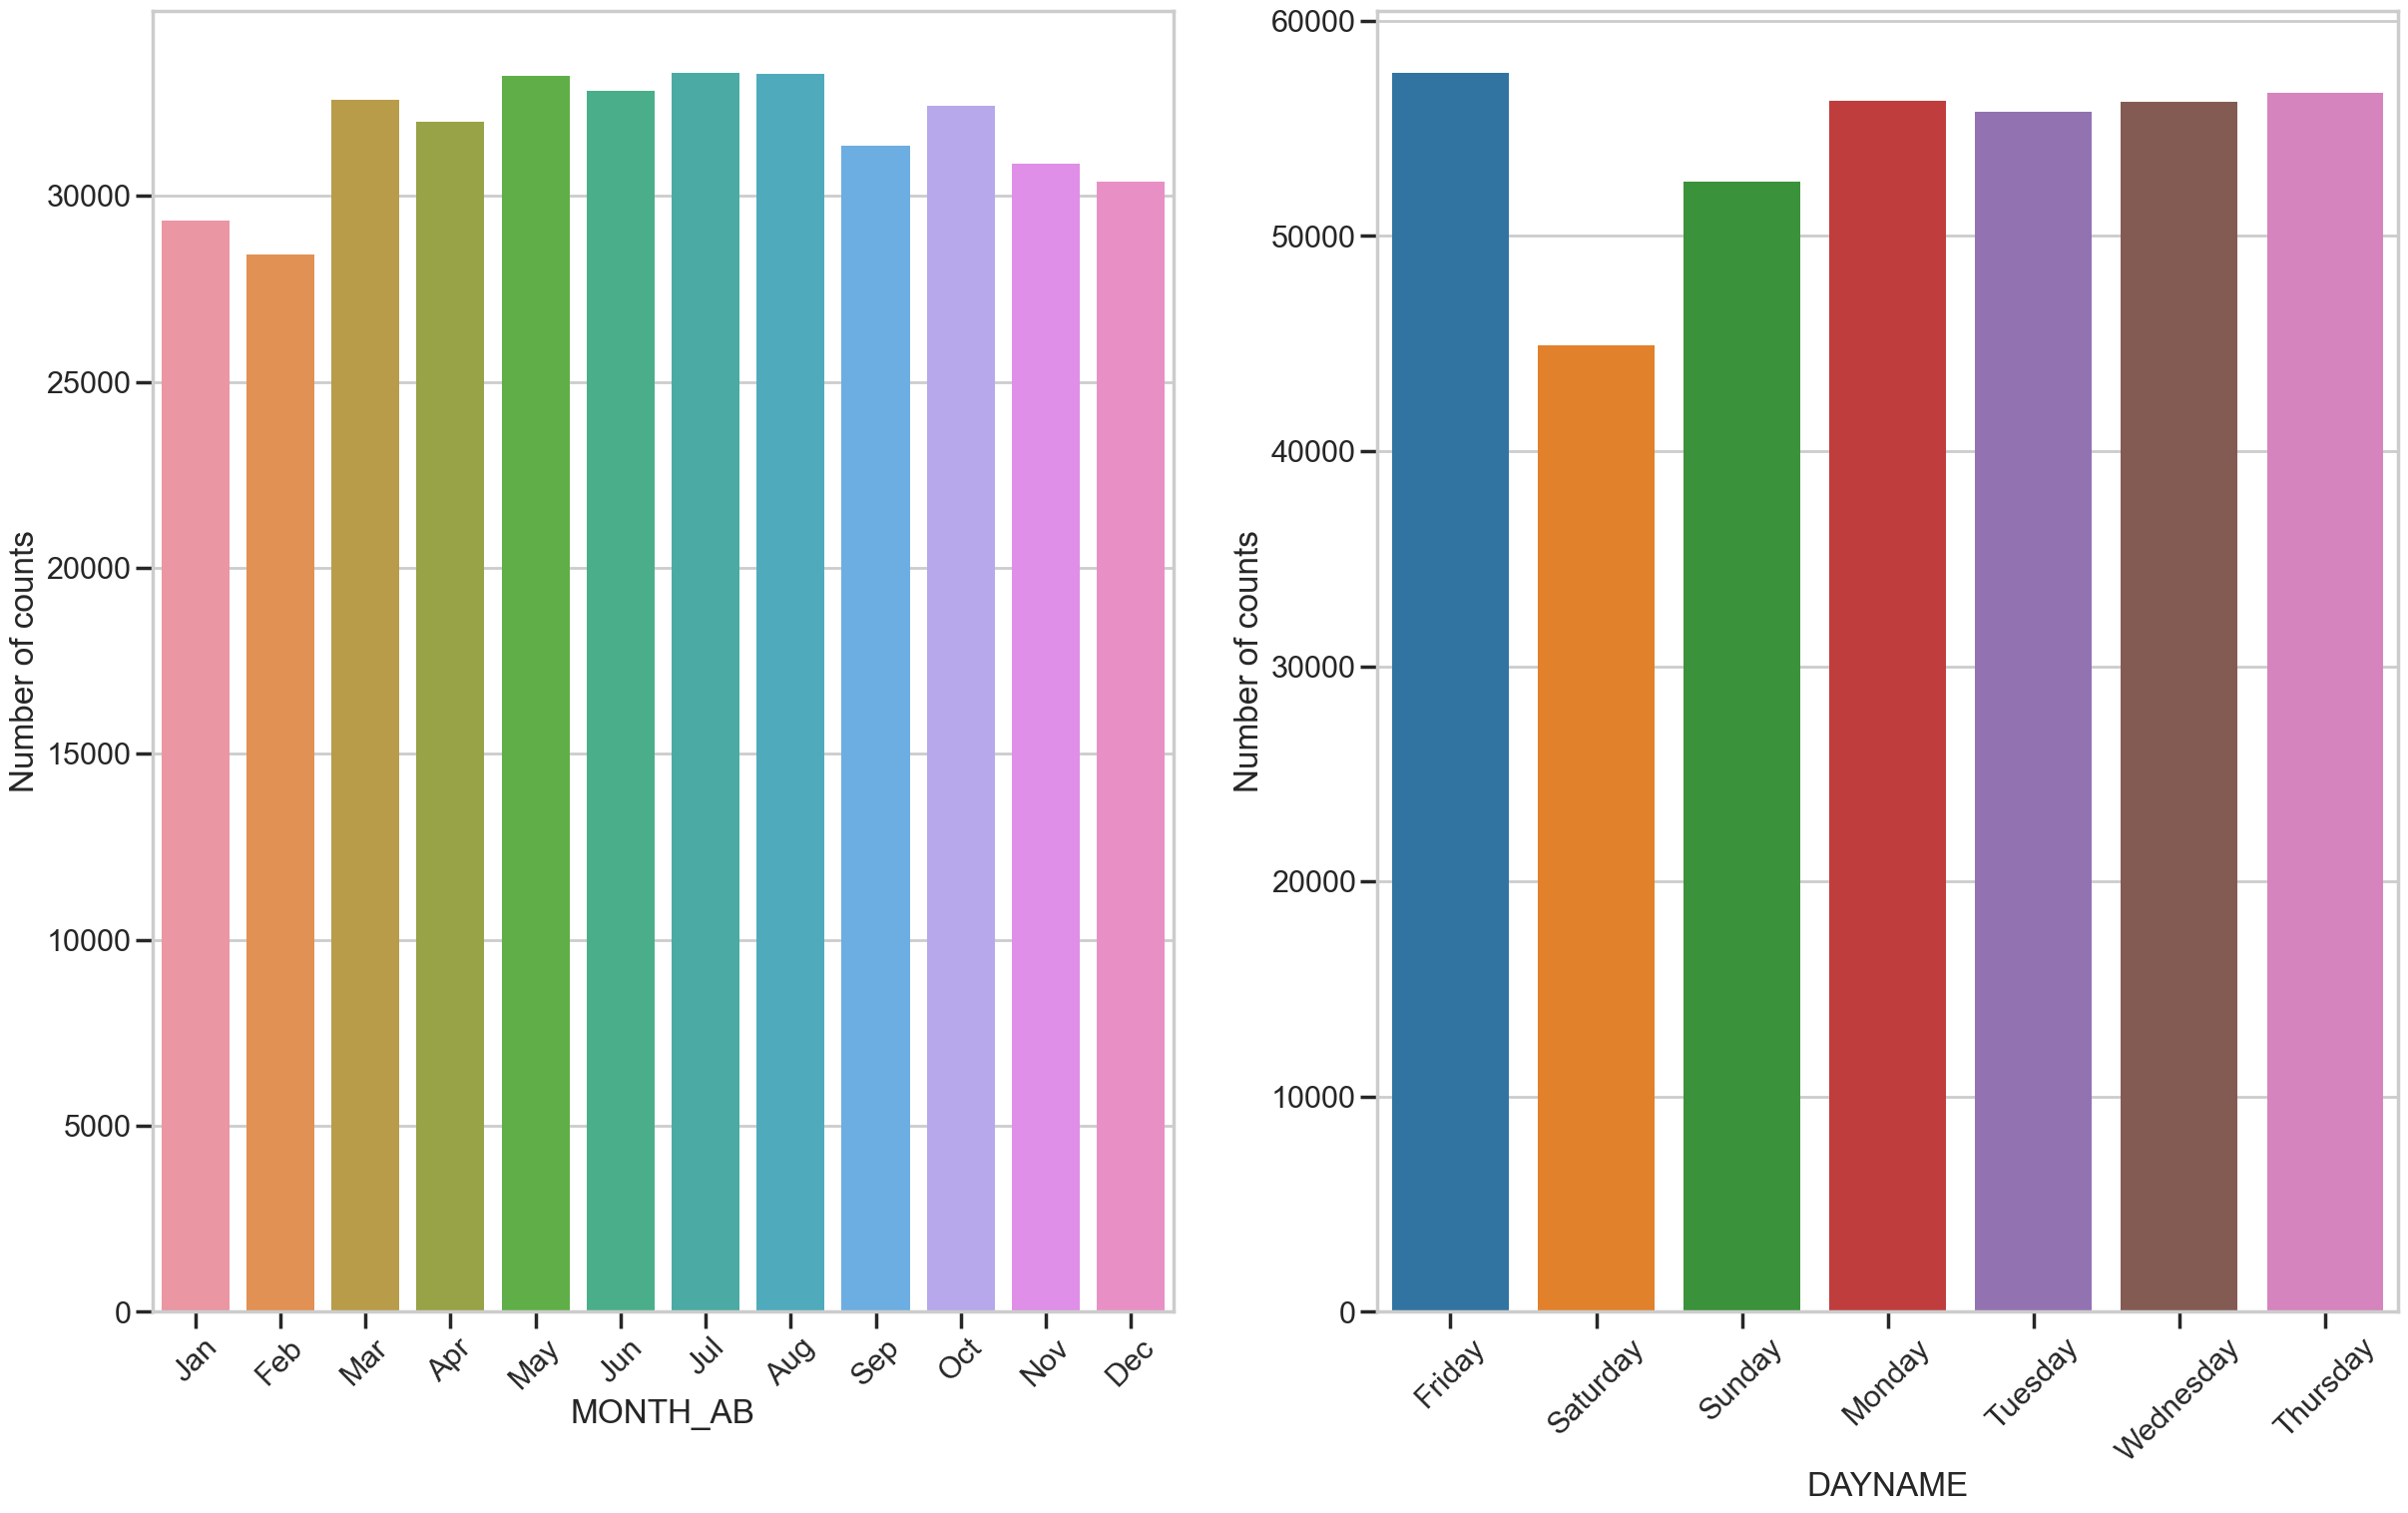

In [47]:
# Finding categorical features

category = []
for i in flight_category:
    if i in ["ORIGIN","DEST","OP_CARRIER","FLIGHT_STATUS"]:
        pass
    else:
        category.append(i)
        
# Output Barplot showing the occurence of each categorical features         
fig, ax = plt.subplots(ncols=2, figsize=(12,12))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2.5)
sns.color_palette("husl", 8)
sns.set_context("poster")

#ncols=2,nrows=round(len(list(category))/2)

for i, feature in enumerate(list(flight_category[category]), 1):
    plt.subplot(len(list(category)), 2, i)
    g=sns.countplot(x=feature,data=flight_category)
    g.set(ylabel="Number of counts")
    plt.xticks(rotation=45)
   
plt.show()

# Classification Modelling

## Data Preparation
>Encoding

>Feature Selection

### One hot encoding for categorical attributes
We converted some categorical variables into numeric variables via one hot encoding method in which one dummy variable would be created for every object in the categorical variable. If the particular object is present, the value would be denoted as 1, otherwise the value would be 0.

In [48]:
Carrier = pd.get_dummies(flight_data['OP_CARRIER'],prefix="OP_CARRIER",drop_first=False)
#Destination = pd.get_dummies(flight_data['DEST'],drop_first=False)
#Destination.columns = ['Charlotte_Airport','Chicago_Airport','Dallas_Airpot','Denver_Airport','Dentroit_Airport','GELL_Airpot','George_Aiport','Hartsfield_Airport','JohnFKeenedy_Airpot','LaGuardia_Airport','LosAngelas_Airport','McCarran_Airport','MSP_Airport','NL_Airport','Orlando_Airport','Philadelphia_Airport','Phoenix_Airport','Ronald_Airport','SanFrancisco_Airport','Seattle_Aiport']                  
month= pd.get_dummies(flight_data['MONTH_AB'],prefix="MONTH",drop_first=False)
day= pd.get_dummies(flight_data['DAYNAME'],prefix="DAY",drop_first=False)

#flight_data_new=pd.concat([flight_data,Carrier,Destination,month,day],axis=1)
flight_data_new=pd.concat([flight_data,Carrier,month,day],axis=1)

In [49]:
flight_data_new.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY,FLIGHT_STATUS,OP_CARRIER_Alaska Airlines,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,MONTH_Nov,MONTH_Oct,MONTH_Sep,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
2,2016-01-01,Delta Airlines,Los Angeles International Airport,Hartsfield-Jackson Atlanta International Airport,1.0,19.0,5.0,-13.0,0.0,245.0,231.0,207.0,1947.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,1,1,Jan,4,Friday,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2016-01-01,Delta Airlines,Salt Lake City International Airport,Hartsfield-Jackson Atlanta International Airport,4.0,12.0,8.0,-16.0,0.0,213.0,193.0,173.0,1590.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,1,1,Jan,4,Friday,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Feature selection


In [50]:
# Drop the redundant columns 

flight_data_new.drop(['FL_DATE', 
                      'OP_CARRIER',
                      'ORIGIN',
                      'DEST',
                      'DAYOFWEEK',
                      'MONTH',
                      'MONTH_AB',
                      'DAY',
                      'DAYNAME',
                      'WEEKDAY',
                      'ARR_DELAY',
                      'CARRIER_DELAY',
                      'WEATHER_DELAY',
                      'NAS_DELAY',
                      'SECURITY_DELAY',
                      'LATE_AIRCRAFT_DELAY'
                 ],
                 axis = 1, inplace = True)

In [51]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


In [52]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379991 entries, 2 to 5617492
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DEP_DELAY                      379991 non-null  float64
 1   TAXI_OUT                       379991 non-null  float64
 2   TAXI_IN                        379991 non-null  float64
 3   DIVERTED                       379991 non-null  float64
 4   CRS_ELAPSED_TIME               379991 non-null  float64
 5   ACTUAL_ELAPSED_TIME            379991 non-null  float64
 6   AIR_TIME                       379991 non-null  float64
 7   DISTANCE                       379991 non-null  float64
 8   WHEELS_OFF_elapse              379991 non-null  float64
 9   WHEELS_ON_elapse               379991 non-null  float64
 10  FLIGHT_STATUS                  379991 non-null  int64  
 11  OP_CARRIER_Alaska Airlines     379991 non-null  uint8  
 12  OP_CARRIER_American Airlines 

In [53]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropConstantFeatures

In [54]:
# separate train and test (again, as we transformed the previous ones)

X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((303992, 38), (75999, 38))

In [55]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')
sel.fit(X_train)

DropConstantFeatures()

In [56]:
# number of quasi-constant features

len(sel.features_to_drop_)

1

In [57]:
sel.features_to_drop_

['DIVERTED']

DIVERTED is a constant features with only one kind of response for all instances. This does not give any information to the model, hence we will drop it.

In [58]:
# Drop the redundant columns 
flight_data_new.drop(['DIVERTED'], axis = 1, inplace = True)

In [59]:
#remove the constant features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((303992, 37), (75999, 37))

Remove multicollinearity effect (Positive)

In [60]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [61]:
corrmat

,feature1,feature2,corr
0,TAXI_OUT,WHEELS_OFF_elapse,1.000000
1,WHEELS_OFF_elapse,TAXI_OUT,1.000000
2,AIR_TIME,DISTANCE,0.985814
3,DISTANCE,AIR_TIME,0.985814
4,AIR_TIME,CRS_ELAPSED_TIME,0.984633
5,CRS_ELAPSED_TIME,AIR_TIME,0.984633
6,ACTUAL_ELAPSED_TIME,AIR_TIME,0.982322
7,AIR_TIME,ACTUAL_ELAPSED_TIME,0.982322
8,DISTANCE,CRS_ELAPSED_TIME,0.981255
9,CRS_ELAPSED_TIME,DISTANCE,0.981255


In [62]:
corrmat.feature1.unique()

array(['TAXI_OUT', 'WHEELS_OFF_elapse', 'AIR_TIME', 'DISTANCE',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME'], dtype=object)

In [63]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 2 correlated groups
out of 37 total features


In [64]:
# now we can print out each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

   feature1           feature2  corr
0  TAXI_OUT  WHEELS_OFF_elapse   1.0

   feature1             feature2      corr
2  AIR_TIME             DISTANCE  0.985814
4  AIR_TIME     CRS_ELAPSED_TIME  0.984633
7  AIR_TIME  ACTUAL_ELAPSED_TIME  0.982322



In [65]:
# we can now investigate further features within one group.
# let's for example select group 1

group = correlated_groups[0]
group

,feature1,feature2,corr
0,TAXI_OUT,WHEELS_OFF_elapse,1.0


In this group, several features are highly correlated. Which one should we keep and which ones should we remove? Alternatively, we could build a machine learning algorithm using all the features from the above list, and select the more predictive one.

In [66]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['CRS_ELAPSED_TIME']

# train a random forest 
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, random_state=100)

In [67]:
# get the feature importance attributed by the 
# random forest model (more on this in coming lectures)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
0,WHEELS_OFF_elapse,0.96844
1,CRS_ELAPSED_TIME,0.03156


ACTUAL_ELAPSED_TIME,CRS_ELAPSED_TIME,AIR_TIME are highly correlated to each other as they are transformed from the same attributes. Thus, we keep ACTUAL_ELAPSED_TIME as it gives the greatest importance as compared to other attributes.

In [68]:
#X_train = X_train.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)
#X_test = X_test.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)

In [69]:
# Drop the redundant columns 
flight_data_new.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)

In [70]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat <= -0.8]
corrmat = corrmat[corrmat > -1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [71]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 0 correlated groups
out of 37 total features


# Importance by Random Forest

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((303992, 35), (75999, 35))

In [73]:
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=5)
rf.fit(X_train, y_train)
rf.feature_importances_

array([6.74231673e-01, 1.31735218e-01, 2.33879182e-02, 1.32216490e-02,
       8.45978090e-03, 9.33829824e-02, 2.25761528e-02, 4.51533261e-05,
       1.34762314e-04, 1.43593370e-02, 1.59797898e-03, 5.11292104e-05,
       7.24506688e-05, 2.64347903e-03, 1.06101632e-03, 3.60800557e-05,
       2.34482235e-04, 1.62717537e-03, 2.93687156e-04, 1.78356673e-05,
       2.34948999e-05, 4.74525130e-03, 5.45993870e-04, 1.01435334e-04,
       5.26349483e-05, 1.01282513e-03, 3.17045943e-03, 3.06674555e-04,
       8.54206630e-05, 7.99552515e-05, 1.21097870e-04, 9.37500425e-05,
       1.27255086e-04, 2.33921948e-04, 1.29888005e-04])

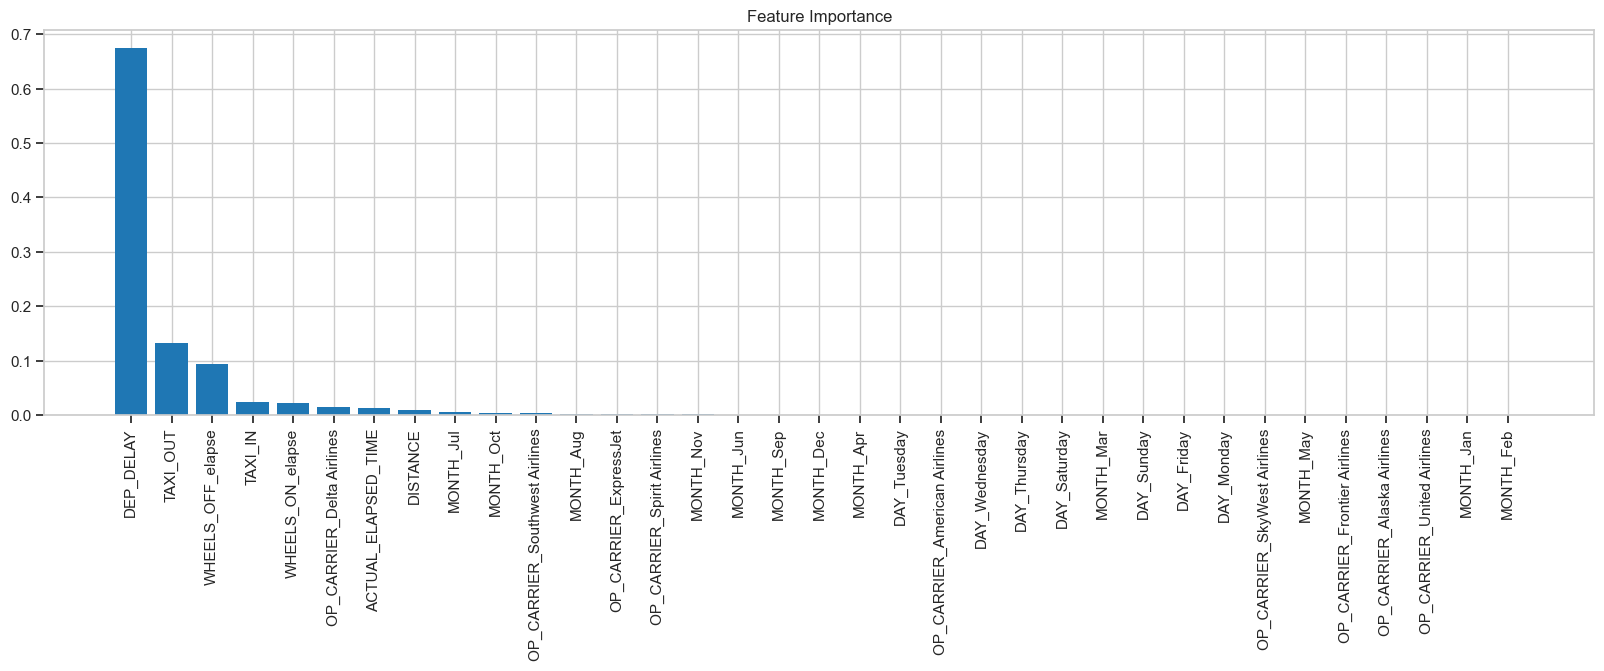

In [74]:
# Sorting in descending order and rearranging feature names to match sorted feature importance
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1] 
names = [X_train.columns[i] for i in indices]

# Bar chart creation
sns.set_context("notebook")
plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), names, rotation = 90)

plt.show()

In [75]:
features=pd.DataFrame(names)
scale = pd.DataFrame(importance[indices])
keep_features = pd.concat([features, scale],axis=1)
keep_features

,0,0
0,DEP_DELAY,0.674232
1,TAXI_OUT,0.131735
2,WHEELS_OFF_elapse,0.093383
3,TAXI_IN,0.023388
4,WHEELS_ON_elapse,0.022576
5,OP_CARRIER_Delta Airlines,0.014359
6,ACTUAL_ELAPSED_TIME,0.013222
7,DISTANCE,0.008460
8,MONTH_Jul,0.004745
9,MONTH_Oct,0.003170


# Classification Modelling

In [76]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score, 
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    plot_confusion_matrix,
    plot_precision_recall_curve
)

# Base classifiers
>Logistic regression

>SVM

>Decision Tree

>Random Forest

In [77]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379991 entries, 2 to 5617492
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DEP_DELAY                      379991 non-null  float64
 1   TAXI_OUT                       379991 non-null  float64
 2   TAXI_IN                        379991 non-null  float64
 3   ACTUAL_ELAPSED_TIME            379991 non-null  float64
 4   DISTANCE                       379991 non-null  float64
 5   WHEELS_OFF_elapse              379991 non-null  float64
 6   WHEELS_ON_elapse               379991 non-null  float64
 7   FLIGHT_STATUS                  379991 non-null  int64  
 8   OP_CARRIER_Alaska Airlines     379991 non-null  uint8  
 9   OP_CARRIER_American Airlines   379991 non-null  uint8  
 10  OP_CARRIER_Delta Airlines      379991 non-null  uint8  
 11  OP_CARRIER_ExpressJet          379991 non-null  uint8  
 12  OP_CARRIER_Frontier Airlines 

In [78]:
flight_data_new["FLIGHT_STATUS"] = flight_data_new["FLIGHT_STATUS"].astype('category')

In [79]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379991 entries, 2 to 5617492
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DEP_DELAY                      379991 non-null  float64 
 1   TAXI_OUT                       379991 non-null  float64 
 2   TAXI_IN                        379991 non-null  float64 
 3   ACTUAL_ELAPSED_TIME            379991 non-null  float64 
 4   DISTANCE                       379991 non-null  float64 
 5   WHEELS_OFF_elapse              379991 non-null  float64 
 6   WHEELS_ON_elapse               379991 non-null  float64 
 7   FLIGHT_STATUS                  379991 non-null  category
 8   OP_CARRIER_Alaska Airlines     379991 non-null  uint8   
 9   OP_CARRIER_American Airlines   379991 non-null  uint8   
 10  OP_CARRIER_Delta Airlines      379991 non-null  uint8   
 11  OP_CARRIER_ExpressJet          379991 non-null  uint8   
 12  OP_CARRIER_Fron

In [80]:
flight_data_new.to_csv('flight_data_new.csv',index=False)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((303992, 35), (75999, 35))

# Random Forest

In [82]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)

    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf.predict(X_test)))

In [83]:
run_randomForests(X_train, X_test, y_train, y_test)

Test set
Roc-auc Random Forests roc-auc: 0.9785247059803732

Accuracy Random Forest test: 0.9175383886630087

Precision Random Forest test: 0.9892703862660944

Recall Random Forest test: 0.3411565704619939

F-measure Random Forest test: 0.5073500510966119

Summary Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     66540
           1       0.99      0.34      0.51      9459

    accuracy                           0.92     75999
   macro avg       0.95      0.67      0.73     75999
weighted avg       0.92      0.92      0.90     75999



# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
def run_logisticReg(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(random_state=100)
    lr.fit(X_train, y_train)

    print('Test set')
    pred = lr.predict_proba(X_test)
    print('Roc-auc Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Logistic Regression:', accuracy_score(y_test, lr.predict(X_test)))
    print()
    print('Precision Logistic Regression:', precision_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Recall Logistic Regression:', recall_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('F-measure Logistic Regression:', f1_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, lr.predict(X_test)))

In [86]:
run_logisticReg(X_train, X_test, y_train, y_test)

Test set
Roc-auc Logistic Regression roc-auc: 0.9909474290400094

Accuracy Logistic Regression: 0.967696943380834

Precision Logistic Regression: 0.905230270770655

Recall Logistic Regression: 0.8270430278042077

F-measure Logistic Regression: 0.8643721341362356

Summary Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     66540
           1       0.91      0.83      0.86      9459

    accuracy                           0.97     75999
   macro avg       0.94      0.91      0.92     75999
weighted avg       0.97      0.97      0.97     75999



# Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
def run_DT(X_train, X_test, y_train, y_test):
    DT = DecisionTreeClassifier(random_state=100)
    DT = DT.fit(X_train,y_train)

    print('Test set')
    pred = DT.predict_proba(X_test)
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Decision Tree:', accuracy_score(y_test, DT.predict(X_test)))
    print()
    print('Precision Decision Tree:', precision_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Recall Decision Tree:', recall_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('F-measure Decision Tree:', f1_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, DT.predict(X_test)))

In [89]:
run_DT(X_train, X_test, y_train, y_test)

Test set
Roc-auc Decision Tree roc-auc: 0.916824590413508

Accuracy Decision Tree: 0.9645653232279372

Precision Decision Tree: 0.8608148464163823

Recall Decision Tree: 0.8532614441272862

F-measure Decision Tree: 0.8570215025219007

Summary Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     66540
           1       0.86      0.85      0.86      9459

    accuracy                           0.96     75999
   macro avg       0.92      0.92      0.92     75999
weighted avg       0.96      0.96      0.96     75999



# Support Vector Machine (SVM)

In [90]:
from sklearn import svm

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
def run_SVM(X_train, X_test, y_train, y_test):
    svm_class = svm.SVC(probability=True, random_state=100)
    svm_class.fit(X_train, y_train)
    pred = rf.predict_proba(test_X)

    print('Test set')
    pred = svm_class.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, svm_class.pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, svm_class.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, svm_class.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, svm_class.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, svm_class.predict(X_test),pos_label=1))